In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
sns.set(color_codes=True)
%matplotlib inline

In [2]:
CustomerChurn = pd.read_csv('Churn.csv')

In [5]:
CustomerChurn.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


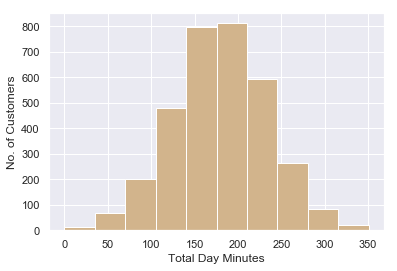

In [10]:
#1. Calculate Histogram for time spent on day calls by customers
plt.hist(CustomerChurn['total day minutes'], bins= 10, facecolor= 'tan')
plt.xlabel('Total Day Minutes')
plt.ylabel('No. of Customers')
plt.show()


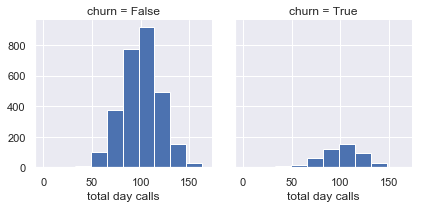

In [43]:
#2. How do we categorize the churner and the non-churner for the time spent on day calls(total day minutes)
import seaborn as sns
g = sns.FacetGrid(CustomerChurn, col="churn")
g.map(plt.hist, "total day calls")

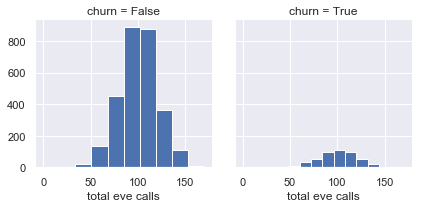

In [41]:
#2. How do we categorize the churner and the non-churner for the time spent on evening calls(total day minutes)
import seaborn as sns
g = sns.FacetGrid(CustomerChurn, col="churn")
g.map(plt.hist, "total eve calls")

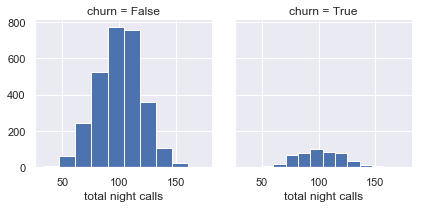

In [42]:
#2. How do we categorize the churner and the non-churner for the time spent on evening calls(total day minutes)
import seaborn as sns
g = sns.FacetGrid(CustomerChurn, col="churn")
g.map(plt.hist, "total night calls")

In [12]:
#3. Find the number of customers who did opt for voice mail plan
CustomerChurn['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

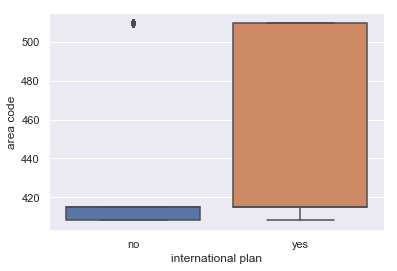

In [13]:
#4. Create a boxplot for a categorical variable(international plan) and continuous variable(area code)
sns.boxplot(x = "international plan", y = "area code", data=CustomerChurn)

In [14]:
#5. Create a crosstab for the area code to find the churner or non-churner.
pd.crosstab(CustomerChurn['area code'],CustomerChurn['voice mail plan'])

voice mail plan,no,yes
area code,,
408,618,220
415,1184,471
510,609,231


In [16]:
#6. calculate the total international minutes for all the combinations -total intl minutes, area code','voice mail plan', international plan
pd.pivot_table(CustomerChurn, 'total intl minutes', index = ['area code','voice mail plan'], columns=['international plan'])

international plan                no        yes
area code voice mail plan                      
408       no               10.087302  10.821569
          yes              10.000500  10.720000
415       no               10.287061  10.605882
          yes              10.327896  11.193750
510       no               10.189642  10.167949
          yes               9.943961  10.600000

In [27]:
#7. Find Standard deviation of total night calls
CustomerChurn['total night calls'].std()

19.568609346058615

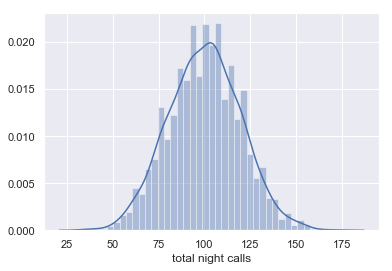

In [28]:
# 8. Plot a distplot for the above result to look at specifically total night calls
sns.distplot(CustomerChurn['total night calls'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A304E9320>,
      dtype=object)

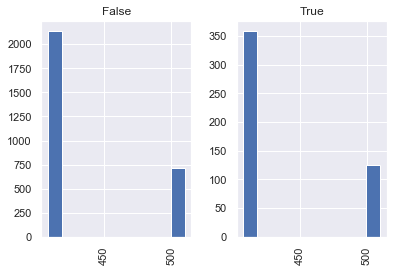

In [23]:
# 9. Plot a histogram to group it by churner or non-churner for the column area code
CustomerChurn.hist(by='churn', column = 'area code')

In [29]:
CustomerChurn['total night calls'].var()

382.9304717386526

In [14]:
CustomerChurn['total night calls'].std()

19.568609346058615

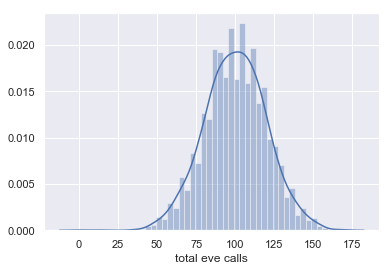

In [15]:
sns.distplot(CustomerChurn['total eve calls'])

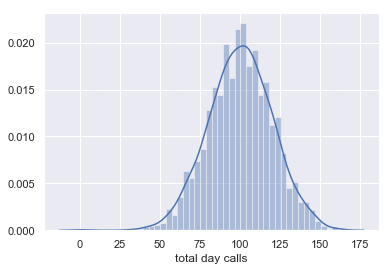

In [16]:
sns.distplot(CustomerChurn['total day calls'])

In [30]:
pd.crosstab(CustomerChurn['international plan'],CustomerChurn ['churn'])

churn,False,True
international plan,,
no,2664,346
yes,186,137


In [31]:
pd.crosstab(CustomerChurn['voice mail plan'],CustomerChurn ['churn'])

churn,False,True
voice mail plan,,
no,2008,403
yes,842,80


In [19]:
CustomerChurn.corr()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


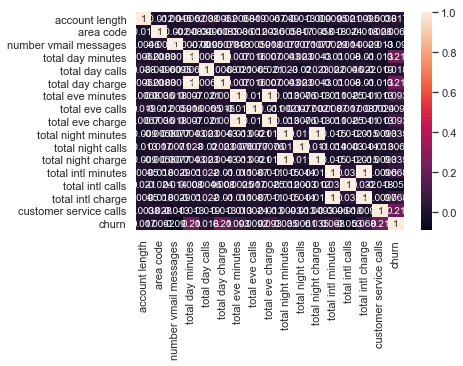

In [20]:
sns.heatmap(CustomerChurn.corr(),annot=True)

In [33]:
newdf=CustomerChurn.drop(['phone number'],axis=1)

In [34]:
newdf["international plan"]=newdf["international plan"].replace("no",0)
newdf["international plan"]=newdf["international plan"].replace("yes",1)
newdf["voice mail plan"]=newdf["voice mail plan"].replace("no",0)
newdf["voice mail plan"]=newdf["voice mail plan"].replace("yes",1)

In [35]:
newdf["churn"]=newdf["churn"].replace("FALSE",0)
newdf["churn"]=newdf["churn"].replace("TRUE",1)

In [36]:
newdf.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


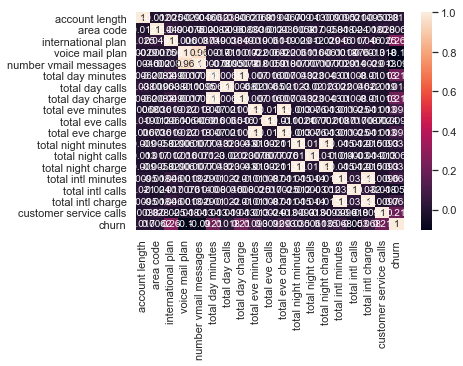

In [37]:
sns.heatmap(newdf.corr(),annot=True)

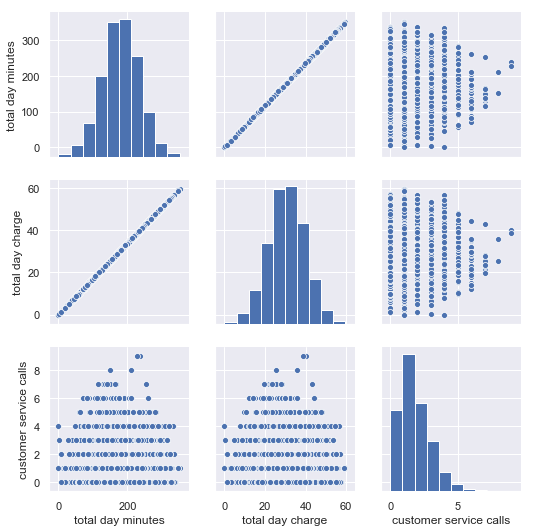

In [38]:
sns.pairplot(newdf[['total day minutes', 'total day charge', 'customer service calls']])

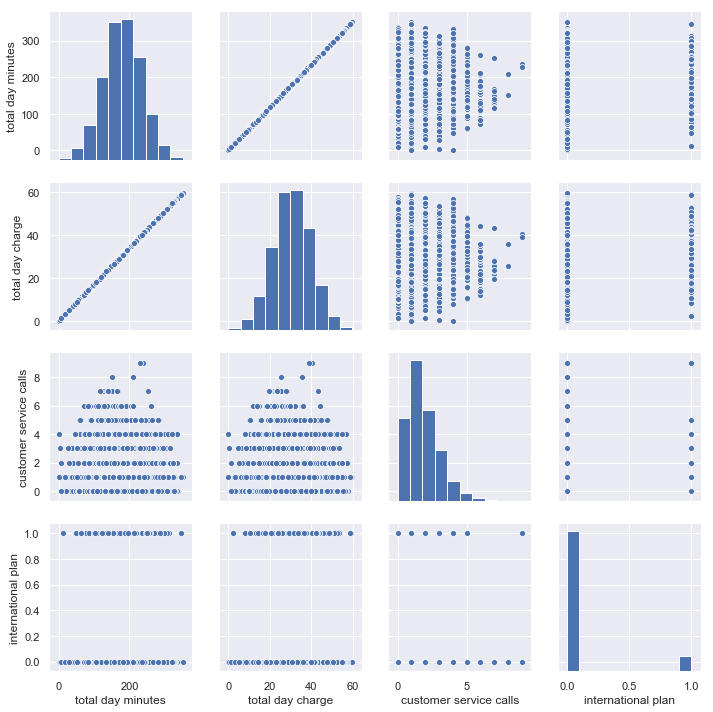

In [10]:
sns.pairplot(newdf[['total day minutes', 'total day charge', 'customer service calls','international plan']])

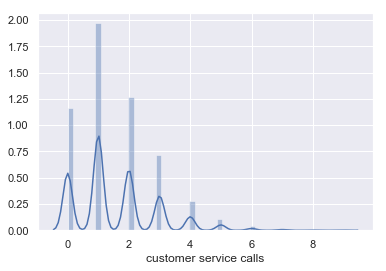

In [10]:
sns.distplot(newdf['customer service calls'])

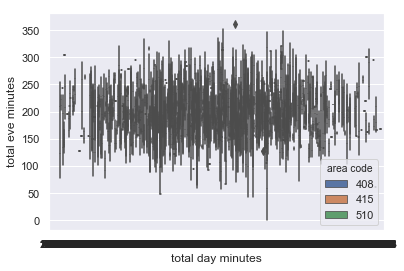

In [9]:
sns.boxplot(newdf['total day minutes'], newdf['total eve minutes'], hue=newdf['area code'])

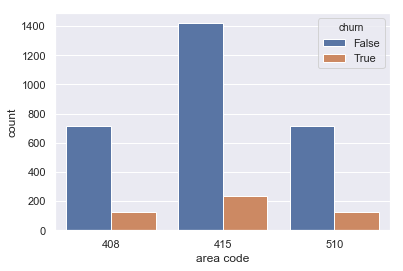

In [39]:
#10. Calculate areawise churner or non-churner using countplot
newdf['area code']= newdf['area code'].astype('category')
sns.countplot(x="area code", hue= "churn", data=newdf)

# Analysis -  Highest # of churners are observed in 415 area code and also those who neither opted for International plan nor any voice mail plan facility.
# Secondly, churners have shown the total day calls/total evening calls/total night calls not beyond 90-110 range.